In [1]:
import numpy as np
import h5py
import tensorflow as tf
from helping import *
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

In [2]:
print(tf.__version__)
X_train,X_test,Y_train,Y_test,classes=load_datasets()

1.13.1


In [3]:
X_train.shape

(1080, 64, 64, 3)

In [4]:
X_test.shape

(120, 64, 64, 3)

[[0 0 0 5 1 0 3 1 5 1 5 1 3 1 1 3 5 4 0 4 5 4 2 5 3 5 4 2 1 2 3 1 0 3 1 1
  0 4 2 3 0 3 0 2 3 1 2 2 0 3 4 1 2 0 4 0 4 0 4 4 5 5 2 4 4 5 0 1 3 5 0 4
  1 2 3 4 3 5 1 5 2 0 1 4 2 4 4 1 4 5 5 0 0 5 5 5 3 3 5 2 2 2 0 2 5 3 0 2
  3 4 1 3 2 4 2 2 1 3 1 3]]


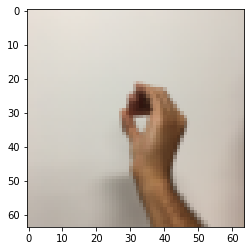

In [5]:
plt.imshow(X_test[1])
print(Y_test)

In [6]:
X_train=X_train/255
X_test=X_test/255
Y_train=one_h_encoding(Y_train,6).T
Y_test=one_h_encoding(Y_test,6).T

In [7]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1080, 64, 64, 3) (120, 64, 64, 3) (1080, 6) (120, 6)


In [8]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X=tf.placeholder(tf.float32,[None,n_H0, n_W0, n_C0])
    Y=tf.placeholder(tf.float32,[None,n_y])
    return X,Y    

In [9]:
def initialize_parameters():
    W1=tf.get_variable("W1",[4,4,3,8],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W2=tf.get_variable("W2",[2,2,8,16],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    parameters = {"W1": W1,
                  "W2": W2}
    return parameters

In [10]:
def forward_pass(X,parameters):
    W1=parameters["W1"]
    W2=parameters["W2"]
    Z1=tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME')
    A1=tf.nn.relu(Z1)
    P1=tf.nn.max_pool(A1,ksize=[1,8,8,1],strides=[1,8,8,1],padding='SAME')
    Z2=tf.nn.conv2d(P1,W2,strides=[1,1,1,1],padding='SAME')
    A2=tf.nn.relu(Z2)
    P2=tf.nn.max_pool(A2,ksize=[1,4,4,1],strides=[1,4,4,1],padding='SAME')
    F=tf.contrib.layers.flatten(P2)
    Z3=tf.contrib.layers.fully_connected(F,6,activation_fn=None)
    return Z3

In [11]:
def compute_cost(Z3,Y):
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    return cost

In [20]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.005,
          num_epochs =500,minibatch_size = 64, print_cost = True):
    ops.reset_default_graph()                         
    tf.set_random_seed(1)                             
    seed = 3                                        
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                       
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    parameters = initialize_parameters()
    Z3 =forward_pass(X,parameters)
    cost = compute_cost(Z3,Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = random_minibatchs(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost],
                                                feed_dict={X:minibatch_X ,
                                                           Y:minibatch_Y})
                
                minibatch_cost += temp_cost / num_minibatches
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 1.927888
Cost after epoch 5: 1.854635
Cost after epoch 10: 1.439450
Cost after epoch 15: 1.160200
Cost after epoch 20: 0.871293
Cost after epoch 25: 0.696556
Cost after epoch 30: 0.577709
Cost after epoch 35: 0.502007
Cost after epoch 40: 0.434006
Cost after epoch 45: 0.397068
Cost after epoch 50: 0.379742
Cost after epoch 55: 0.352013
Cost after epoch 60: 0.313656
Cost after epoch 65: 0.310130
Cost after epoch 70: 0.315336
Cost after epoch 75: 0.263555
Cost after epoch 80: 0.254034
Cost after epoch 85: 0.244140
Cost after epoch 90: 0.202095
Cost after epoch 95: 0.204904
Cost after epoch 100: 0.175471
Cost after epoch 105: 0.171691
Cost after epoch 110: 0.215848
Cost after epoch 115: 0.153194
Cost after epoch 120: 0.155095
Cost after epoch 125: 0.162249
Cost after epoch 130: 0.122017
Cost after epoch 135: 0.113472
Cost after epoch 140: 0.158914
Cost after epoch 145: 0.107801
Cost after epoch 150: 0.091629
Cost after epoch 155: 0.093330
Cost after epoch 160: 0.092120

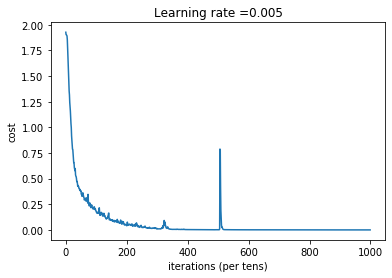

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 1.0
Test Accuracy: 0.89166665


In [21]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)